<a href="https://colab.research.google.com/github/Thiago-Reis-Porto/Trab_2_CLP-/blob/main/CLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
!wget https://github.com/Thiago-Reis-Porto/Trab_2_CLP-/archive/refs/heads/main.zip
!unzip main.zip

In [ ]:
path = 'Trab_2_CLP--main/logs/'

#Utils

In [ ]:
# Fill lists with data from log files
def fill_data(file_name, micro_seconds_list, i1_list, d1_list, ll_list):
    with open(file_name) as f:
        for line in f:
          ls = line.split()
          if len(ls)>2:
            if len(ls)>3:
              if ls[0]=='Micro':
                micro_seconds_list.append(int(ls[3]))
            if ls[1] == 'I1' and ls[2] == 'misses:':
              i1_list.append(int(ls[3].replace(",","")))
            if ls[1] == 'D1' and ls[2] == 'misses:':
              d1_list.append(int(ls[3].replace(",","")))
            if ls[1] == 'LL' and ls[2] == 'misses:':
              ll_list.append(int(ls[3].replace(",",""))) 

In [ ]:
# Fill table(pandas data frame) with data means from program dictionary
def fill_table(table, prog_dict):
  d = prog_dict
  ol = ['O0', 'O0', 'O2', 'O2', 'O3', 'O3']
  cl = ['S', 'W', 'S', 'W', 'S', 'W']
  table.O = ol
  table.Class = cl
  e = []; i1 = []; d1=[]; ll=[]
  for i, j in zip(ol,cl):
     e.append(int(np.mean(d[i][j]['exec_time'])))
     d1.append(int(np.mean(d[i][j]['cache_misses']['data_1'])))
     i1.append(int(np.mean(d[i][j]['cache_misses']['inst_1'])))
     ll.append(int(np.mean(d[i][j]['cache_misses']['last_level'])))
  table['exec_time(microseconds_media)'] = e
  table['i1_misses(media)'] = i1
  table['d1_misses(media)'] = d1
  table['ll_misses(media)'] = ll

In [ ]:
#Fill program dictionary with data from log files 
def fill_class_data(class_name, file_name, optimization_dict):
  optimization_dict[class_name] = {}
  aux = optimization_dict[class_name]
  aux['exec_time'] = [] # Execution time in seconds.microseconds
  aux['cache_misses'] = {} # Cache misses dictionary
  aux['exec_time'] = []
  aux['cache_misses']['data_1'] = [] 
  aux['cache_misses']['inst_1'] = []
  aux['cache_misses']['last_level'] = []
  e = aux['exec_time']
  d1 = aux['cache_misses']['data_1'] 
  i1 = aux['cache_misses']['inst_1']
  ll = aux['cache_misses']['last_level']
  fill_data(path+file_name, e, i1, d1, ll)

In [ ]:
def plot_line_data(data_1, data_2, Xticks, X_label, Y_label, title, legend):
  X = [i for i in range(len(Xticks))]
  plt.plot(X, data_1, label=legend[0])
  plt.plot(X, data_2, label=legend[1])
  plt.xticks(X, Xticks)
  plt.xlabel(X_label)
  plt.ylabel(Y_label)
  plt.title(title)
  #plt.grid()
  plt.legend()
  plt.show

In [ ]:
def plot_line_data2(data, Xticks, X_label, Y_label, title, legend):
  X = [i for i in range(len(Xticks))]
  for d, l in zip(data, legend):
    plt.plot(X, d, label=l)
  plt.xticks(X, Xticks)
  plt.xlabel(X_label)
  plt.ylabel(Y_label)
  plt.title(title)
  plt.legend()
  plt.show

In [ ]:
def line_plot(table, title, column, Y_label, fig_size=[8,5]):
  plt.rcParams['figure.figsize'] = fig_size
  df = table
  data_1 = df[(df['Class'] == 'S')][column]
  data_2 = df[(df['Class'] == 'W')][column]
  plot_line_data(
    data_1, data_2, ['O0', 'O2', 'O3'], 
    'Otimização', Y_label, title, ['Classe S', 'Classe W'])

In [ ]:
def line_plot2(tables, Class, title, column, Y_label, fig_size=[8,5]):
  plt.rcParams['figure.figsize'] = fig_size
  data = []
  for t in tables:
    data.append( t[(t['Class'] == Class)][column])
  plot_line_data2(
    data, ['O0', 'O2', 'O3'], 
    'Otimização', Y_label, title, ['IS', 'EP', 'FT', 'IS', 'MG'])

In [ ]:
IS = {}
EP = {}
CG = {}
MG = {}
FT = {}

#Programas

# IS

In [ ]:
IS['O0'] = {}
IS['O2'] = {}
IS['O3'] = {}

## O0

In [ ]:
O0 = IS['O0']

 S

In [ ]:
fill_class_data('S', 'is_S_O0.log', O0)

W

In [ ]:
fill_class_data('W', 'is_W_O0.log', O0)

##O2

In [ ]:
O2 = IS['O2']

S

In [ ]:
fill_class_data('S', 'is_S_O2.log', O2)

w

In [ ]:
fill_class_data('W', 'is_W_O2.log', O2)

##O3

In [ ]:
O3 = IS['O3']

S

In [ ]:
fill_class_data('S', 'is_S_O3.log', O3)

w

In [ ]:
fill_class_data('W', 'is_W_O3.log', O3)

# EP

In [ ]:
EP['O0'] = {}
EP['O2'] = {}
EP['O3'] = {}

## O0

In [ ]:
O0 = EP['O0']

 S

In [ ]:
fill_class_data('S', 'ep_S_O0.log', O0)

W

In [ ]:
fill_class_data('W', 'ep_W_O0.log', O0)

##O2

In [ ]:
O2 = EP['O2']

S

In [ ]:
fill_class_data('S', 'ep_S_O2.log', O2)

w

In [ ]:
fill_class_data('W', 'ep_W_O2.log', O2)

##O3

In [ ]:
O3 = EP['O3']

S

In [ ]:
fill_class_data('S', 'ep_S_O3.log', O3)

w

In [ ]:
fill_class_data('W', 'ep_W_O3.log', O3)

# CG

In [ ]:
CG['O0'] = {}
CG['O2'] = {}
CG['O3'] = {}

## O0

In [ ]:
O0 = CG['O0']

 S

In [ ]:
fill_class_data('S', 'cg_S_O0.log', O0)

W

In [ ]:
fill_class_data('W', 'cg_W_O0.log', O0)

##O2

In [ ]:
O2 = CG['O2']

S

In [ ]:
fill_class_data('S', 'cg_S_O2.log', O2)

w

In [ ]:
fill_class_data('W', 'cg_W_O2.log', O2)

##O3

In [ ]:
O3 = CG['O3']

S

In [ ]:
fill_class_data('S', 'cg_S_O3.log', O3)

w

In [ ]:
fill_class_data('W', 'cg_W_O3.log', O3)

# MG

In [ ]:
MG['O0'] = {}
MG['O2'] = {}
MG['O3'] = {}

## O0

In [ ]:
O0 = MG['O0']

 S

In [ ]:
fill_class_data('S', 'mg_S_O0.log', O0)

W

In [ ]:
fill_class_data('W', 'mg_W_O0.log', O0)

##O2

In [ ]:
O2 = MG['O2']

S

In [ ]:
fill_class_data('S', 'mg_S_O2.log', O2)

w

In [ ]:
fill_class_data('W', 'mg_W_O2.log', O2)

##O3

In [ ]:
O3 = MG['O3']

S

In [ ]:
fill_class_data('S', 'mg_S_O3.log', O3)

w

In [ ]:
fill_class_data('W', 'mg_W_O3.log', O3)

# FT

In [ ]:
FT['O0'] = {}
FT['O2'] = {}
FT['O3'] = {}

## O0

In [ ]:
O0 = FT['O0']

 S

In [ ]:
fill_class_data('S', 'ft_S_O0.log', O0)

W

In [ ]:
fill_class_data('W', 'ft_W_O0.log', O0)

##O2

In [ ]:
O2 = FT['O2']

S

In [ ]:
fill_class_data('S', 'ft_S_O2.log', O2)

w

In [ ]:
fill_class_data('W', 'ft_W_O2.log', O2)

##O3

In [ ]:
O3 = FT['O3']

S

In [ ]:
fill_class_data('S', 'ft_S_O3.log', O3)

w

In [ ]:
fill_class_data('W', 'ft_W_O3.log', O3)

#TABELAS

In [ ]:
COLUMNS = ['Class','O', 'exec_time(microseconds_media)', 'i1_misses(media)', 'd1_misses(media)', 'll_misses(media)']

In [ ]:
tabela_IS = pd.DataFrame(columns=COLUMNS)
tabela_EP = pd.DataFrame(columns=COLUMNS) 
tabela_CG = pd.DataFrame(columns=COLUMNS) 
tabela_MG = pd.DataFrame(columns=COLUMNS)
tabela_FT = pd.DataFrame(columns=COLUMNS)

In [ ]:
fill_table(tabela_IS, IS)
fill_table(tabela_EP, EP)
fill_table(tabela_CG, CG)
fill_table(tabela_MG, MG)
fill_table(tabela_FT, FT)

In [ ]:
tabela_IS

,Class,O,exec_time(microseconds_media),i1_misses(media),d1_misses(media),ll_misses(media),P
0,S,O0,216319,1385,142431,12404,IS
1,W,O0,3229275,1389,11834623,1746171,IS
2,S,O2,103042,1376,142372,12390,IS
3,W,O2,1412177,1368,11833295,1746182,IS
4,S,O3,119217,1374,188146,12396,IS
5,W,O3,1694930,1367,12297290,2487741,IS


In [ ]:
tabela_EP

,Class,O,exec_time(microseconds_media),i1_misses(media),d1_misses(media),ll_misses(media)
0,S,O0,24002562,1481,8421582,20724
1,W,O0,47166336,1482,16823246,20724
2,S,O2,21160132,1450,8421326,20698
3,W,O2,42725592,1450,16822734,20698
4,S,O3,20127388,1456,8421583,20703
5,W,O3,40966186,1456,16823247,20703


In [ ]:
tabela_CG

,Class,O,exec_time(microseconds_media),i1_misses(media),d1_misses(media),ll_misses(media)
0,S,O0,4342181,1542,6572919,45390
1,W,O0,29807258,1543,115426233,41444382
2,S,O2,1498816,1483,6573671,45344
3,W,O2,10849787,1488,114760670,41444174
4,S,O3,1460042,1514,6571151,44864
5,W,O3,10782939,1526,114773724,41442022


In [ ]:
tabela_MG

,Class,O,exec_time(microseconds_media),i1_misses(media),d1_misses(media),ll_misses(media)
0,S,O0,758226,1863,477484,22937
1,W,O0,37157967,1861,29558960,14448172
2,S,O2,216755,1673,478510,22775
3,W,O2,7451259,1675,29560668,14448069
4,S,O3,196724,1950,477024,23003
5,W,O3,5099024,1951,29553465,14443667


In [ ]:
tabela_FT

,Class,O,exec_time(microseconds_media),i1_misses(media),d1_misses(media),ll_misses(media)
0,S,O0,12829233,1705,6665490,2544652
1,W,O0,28808242,1694,43556171,7147731
2,S,O2,2655946,1541,7336632,2641443
3,W,O2,6154694,1545,44689762,7668973
4,S,O3,2246606,1569,7347609,2642023
5,W,O3,4828684,1576,44658782,7669042


In [ ]:
tl = [tabela_CG, tabela_EP, tabela_FT, tabela_IS, tabela_MG]
names = ['CG', 'EP', 'FT', 'IS', 'MG']
for t,n in zip(tl,names):
  t['P'] = n
tabelas = pd.concat(tl)

In [ ]:
tabelas.sort_values(by=['Class','O'])

,Class,O,exec_time(microseconds_media),i1_misses(media),d1_misses(media),ll_misses(media),P
0,S,O0,4342181,1542,6572919,45390,CG
0,S,O0,24002562,1481,8421582,20724,EP
0,S,O0,12829233,1705,6665490,2544652,FT
0,S,O0,216319,1385,142431,12404,IS
0,S,O0,758226,1863,477484,22937,MG
2,S,O2,1498816,1483,6573671,45344,CG
2,S,O2,21160132,1450,8421326,20698,EP
2,S,O2,2655946,1541,7336632,2641443,FT
2,S,O2,103042,1376,142372,12390,IS
2,S,O2,216755,1673,478510,22775,MG


In [ ]:
tabelas.sort_values(by=['d1_misses(media)'])

,Class,O,exec_time(microseconds_media),i1_misses(media),d1_misses(media),ll_misses(media),P
2,S,O2,103042,1376,142372,12390,IS
0,S,O0,216319,1385,142431,12404,IS
4,S,O3,119217,1374,188146,12396,IS
4,S,O3,196724,1950,477024,23003,MG
0,S,O0,758226,1863,477484,22937,MG
2,S,O2,216755,1673,478510,22775,MG
4,S,O3,1460042,1514,6571151,44864,CG
0,S,O0,4342181,1542,6572919,45390,CG
2,S,O2,1498816,1483,6573671,45344,CG
0,S,O0,12829233,1705,6665490,2544652,FT


In [ ]:
tabelas.sort_values(by=['exec_time(microseconds_media)'])

,Class,O,exec_time(microseconds_media),i1_misses(media),d1_misses(media),ll_misses(media),P
2,S,O2,103042,1376,142372,12390,IS
4,S,O3,119217,1374,188146,12396,IS
4,S,O3,196724,1950,477024,23003,MG
0,S,O0,216319,1385,142431,12404,IS
2,S,O2,216755,1673,478510,22775,MG
0,S,O0,758226,1863,477484,22937,MG
3,W,O2,1412177,1368,11833295,1746182,IS
4,S,O3,1460042,1514,6571151,44864,CG
2,S,O2,1498816,1483,6573671,45344,CG
5,W,O3,1694930,1367,12297290,2487741,IS


#GRAFICOS

In [ ]:
COLUMN = 'exec_time(microseconds_media)'
TITLE = ': Tempo de execução em Microsegundos'
Y = 'Microsegundos'

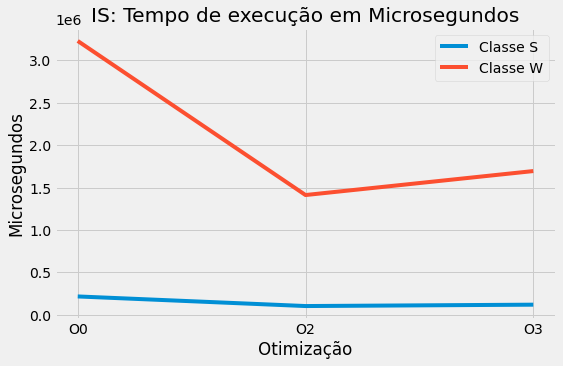

In [ ]:
line_plot(tabela_IS, 'IS'+TITLE, COLUMN, Y)

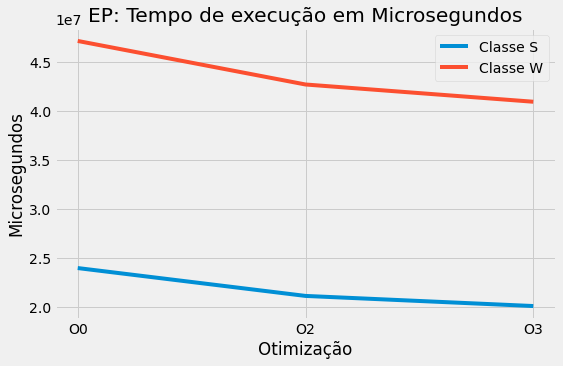

In [ ]:
line_plot(tabela_EP, 'EP'+TITLE, COLUMN, Y)

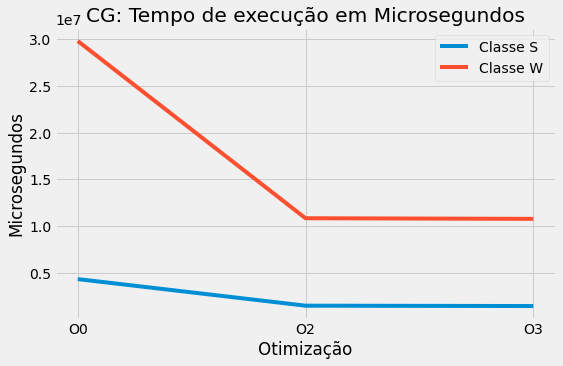

In [ ]:
line_plot(tabela_CG, 'CG'+TITLE, COLUMN, Y)

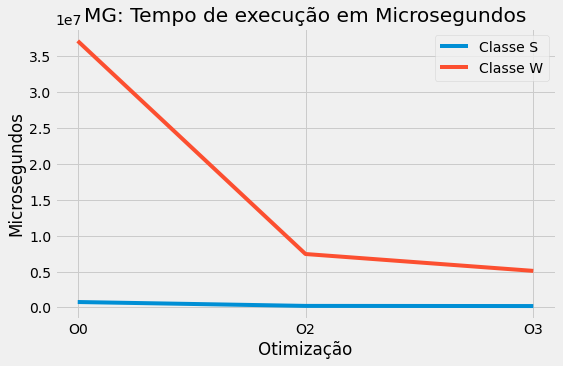

In [ ]:
line_plot(tabela_MG, 'MG'+TITLE, COLUMN, Y)

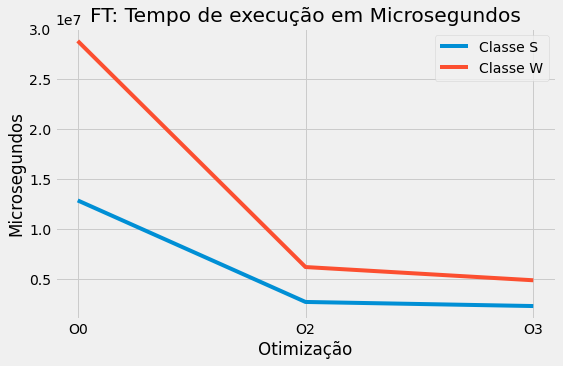

In [ ]:
line_plot(tabela_FT, 'FT'+TITLE, COLUMN, Y)

In [ ]:
COLUMN = 'll_misses(media)'
TITLE = ': Misses instrução na cache L3(LL)'
Y = 'Misses'

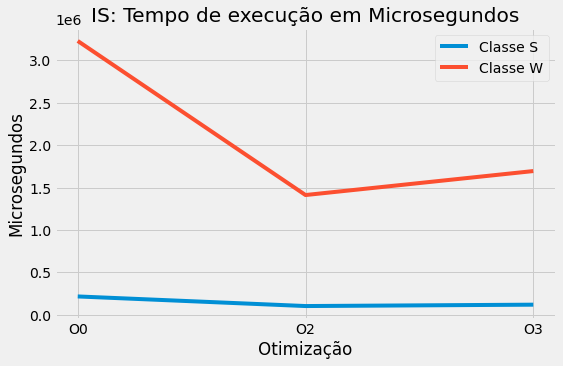

In [ ]:
line_plot(tabela_IS, 'IS'+TITLE, COLUMN, Y)

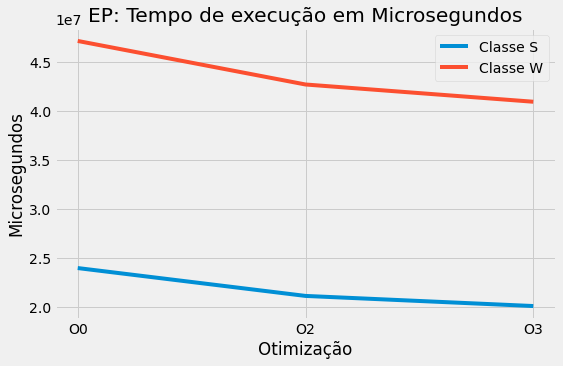

In [ ]:
line_plot(tabela_EP, 'EP'+TITLE, COLUMN, Y)

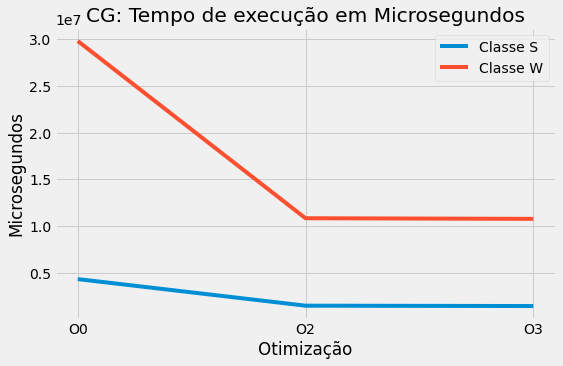

In [ ]:
line_plot(tabela_CG, 'CG'+TITLE, COLUMN, Y)

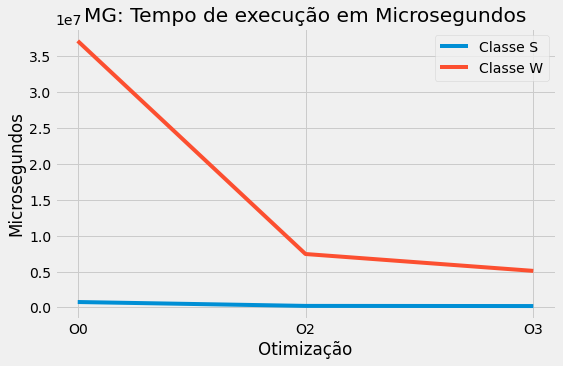

In [ ]:
line_plot(tabela_MG, 'MG'+TITLE, COLUMN, Y)

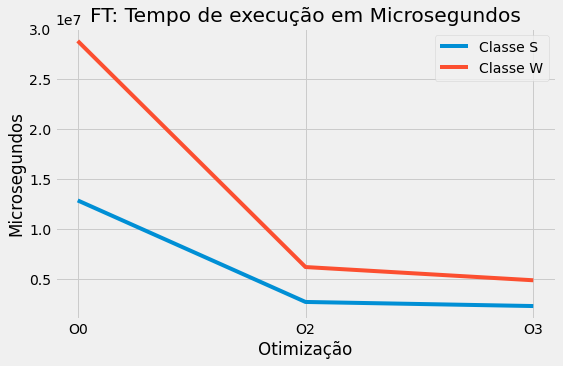

In [ ]:
line_plot(tabela_FT, 'FT'+TITLE, COLUMN, Y)

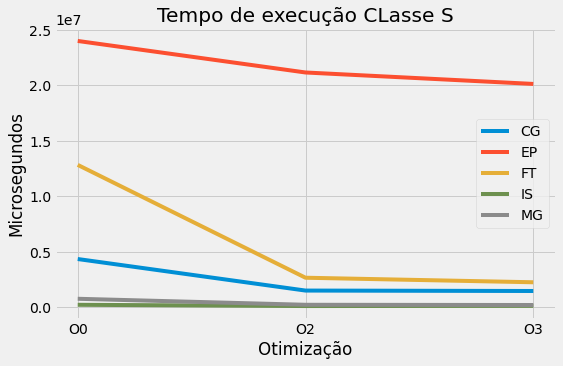

In [ ]:
line_plot2(tl,'S', "Tempo de execução CLasse S", COLUMN, Y)

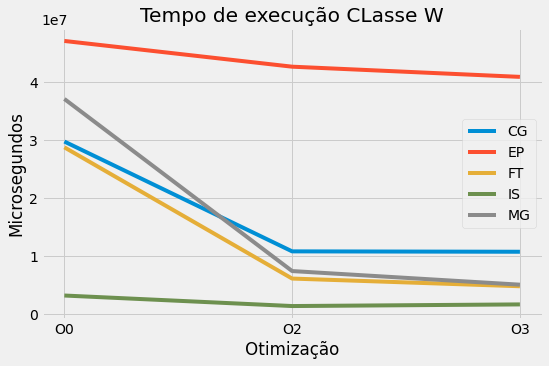

In [ ]:
line_plot2(tl,'W', "Tempo de execução CLasse W", COLUMN, Y)

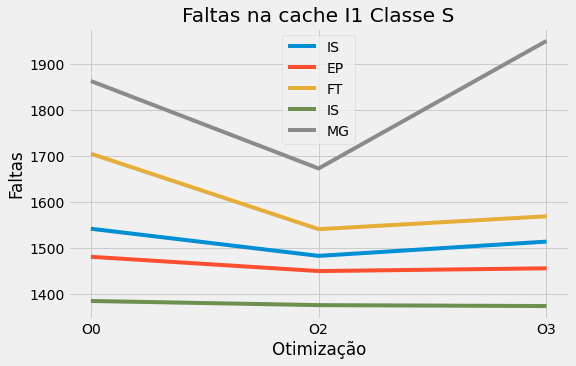

In [ ]:
line_plot2(tl,'S', "Faltas na cache I1 Classe S", 'i1_misses(media)', 'Faltas')

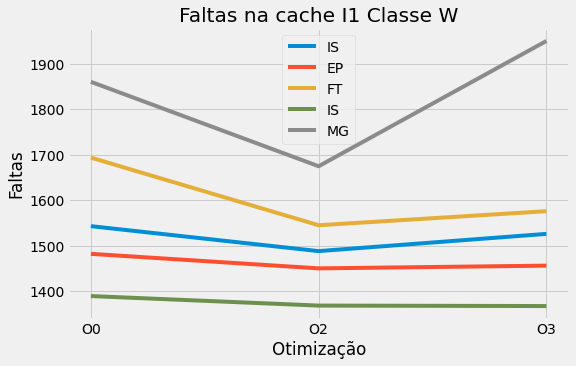

In [ ]:
line_plot2(tl,'W',  "Faltas na cache I1 Classe W", 'i1_misses(media)', 'Faltas')

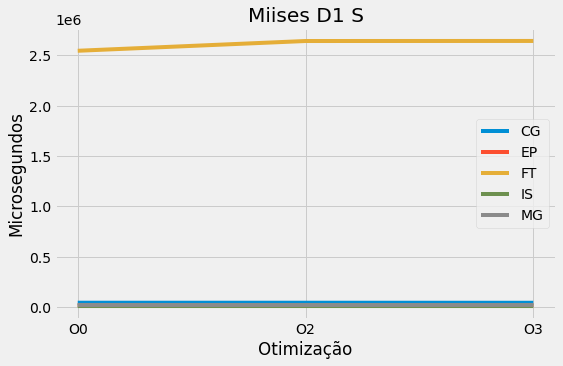

In [ ]:
line_plot2(tl,'S', "Miises D1 S", 'll_misses(media)', Y)

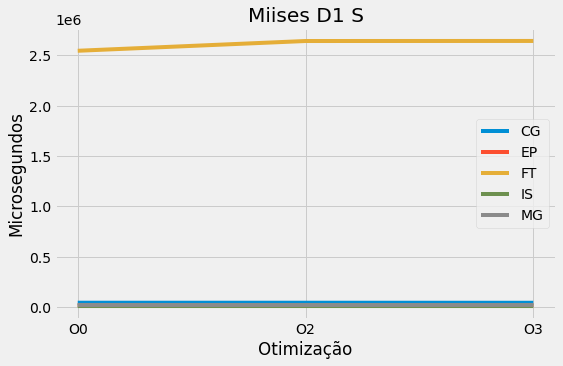

In [ ]:
line_plot2(tl,'S', "Miises D1 S", 'll_misses(media)', Y)

In [ ]:
line_plot2(tl,'S', "Miises D1 S", 'll_misses(media)', Y)

In [ ]:
line_plot2(tl,'W', "Miises LL W", 'll_misses(media)', Y)

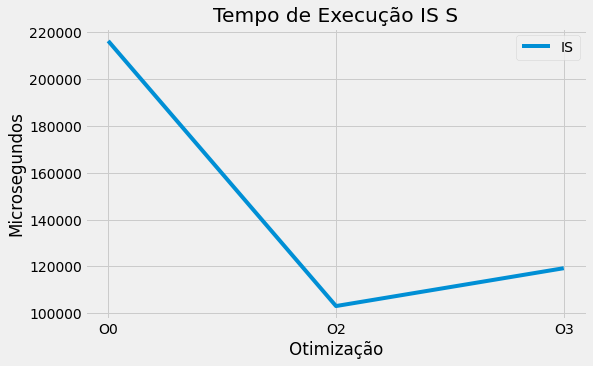

In [ ]:
line_plot2([tabela_IS],'S', "Tempo de Execução IS S", 'exec_time(microseconds_media)', Y)

In [ ]:
tabela_CG

,Class,O,exec_time(microseconds_media),i1_misses(media),d1_misses(media),ll_misses(media),P
0,S,O0,4342181,1542,6572919,45390,CG
1,W,O0,29807258,1543,115426233,41444382,CG
2,S,O2,1498816,1483,6573671,45344,CG
3,W,O2,10849787,1488,114760670,41444174,CG
4,S,O3,1460042,1514,6571151,44864,CG
5,W,O3,10782939,1526,114773724,41442022,CG


#DISTRUBUIÇÕES

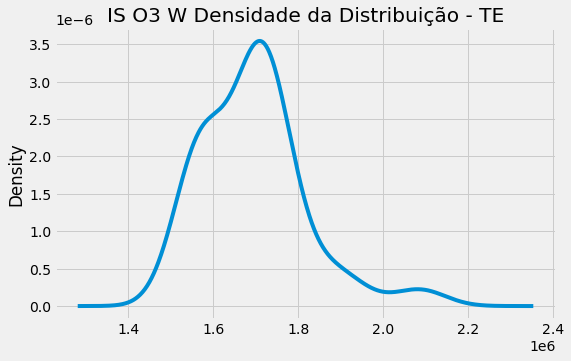

In [ ]:
by = pd.Series(IS['O3']['W']['exec_time'])
by.plot.density(title="IS O3 W Densidade da Distribuição - TE");

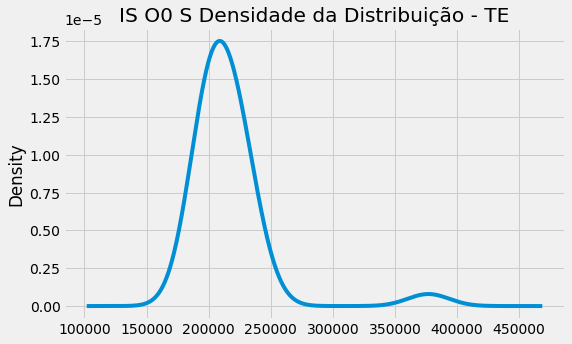

In [ ]:
by = pd.Series(IS['O0']['S']['exec_time'])
by.plot.density(title="IS O0 S Densidade da Distribuição - TE");

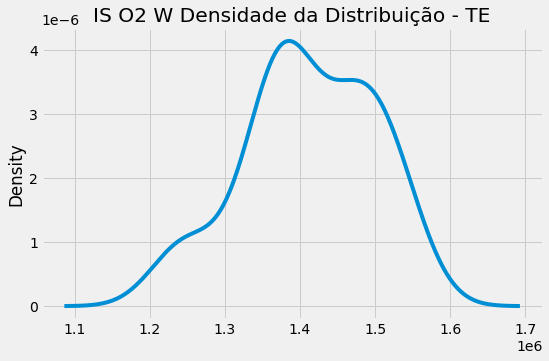

In [ ]:
by = pd.Series(IS['O2']['W']['exec_time'])
by.plot.density(title="IS O2 W Densidade da Distribuição - TE");

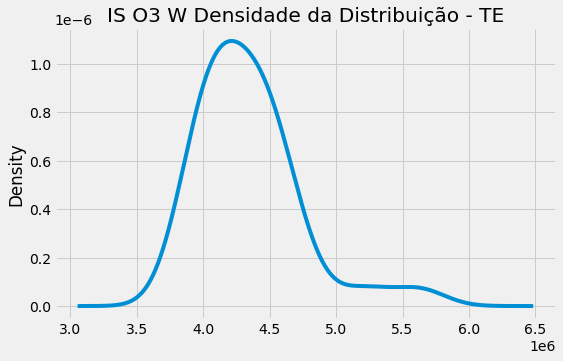

In [ ]:
by = pd.Series(CG['O0']['S']['exec_time'])
by.plot.density(title="IS O3 W Densidade da Distribuição - TE");

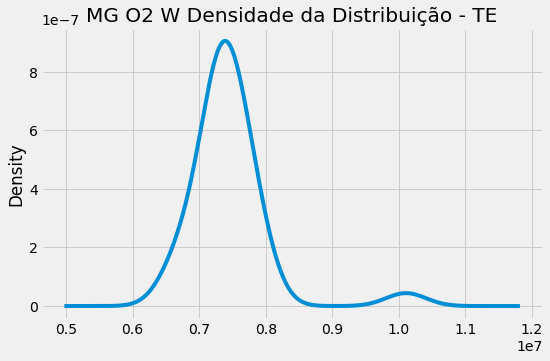

In [ ]:
by = pd.Series(MG['O2']['W']['exec_time'])
by.plot.density(title="MG O2 W Densidade da Distribuição - TE");

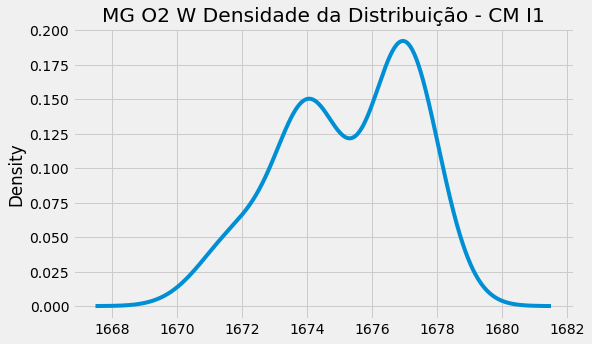

In [ ]:
by = pd.Series(MG['O2']['W']['cache_misses']['inst_1'])
by.plot.density(title="MG O2 W Densidade da Distribuição - CM I1");

In [ ]:
MG['O2']['W']['cache_misses']['inst_1']

[1674,
 1674,
 1677,
 1677,
 1677,
 1674,
 1677,
 1677,
 1677,
 1677,
 1671,
 1677,
 1677,
 1677,
 1677,
 1674,
 1672,
 1674,
 1674,
 1674,
 1672,
 1674,
 1672,
 1674,
 1676,
 1675,
 1677,
 1678,
 1677,
 1674]

In [ ]:
t = tabela_FT.drop(columns='P')
t.columns= ['Classe','O','Tempo(us)','I1(Faltas)','D1(Faltas)','LL(Faltas)']
t.to_csv('tabela_FT.csv',index=False)